In [7]:
import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE/')

from MPRA_exp.utils import *
from MPRA_zero_shot import models
from MPRA_zero_shot import utils

mpl_params = {
    # 图像参数
    'figure.dpi': 100,
    'figure.figsize': (6, 4.5),
}
plt.rcParams.update(mpl_params)

In [9]:
import kipoi
model = kipoi.get_model('DeepSEA/beluga').cpu()

Using downloaded and verified file: /home/hxcai/.kipoi/models/DeepSEA/beluga/downloaded/model_files/weights/62360f2db4ac96554d28d058b50ab654


OutOfMemoryError: CUDA out of memory. Tried to allocate 520.00 MiB. GPU 0 has a total capacty of 23.64 GiB of which 222.44 MiB is free. Process 3044362 has 21.77 GiB memory in use. Process 3188761 has 1.02 GiB memory in use. Including non-PyTorch memory, this process has 474.00 MiB memory in use. Of the allocated memory 73.54 MiB is allocated by PyTorch, and 16.46 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [2]:
# saved_dir = 'saved/0531_GosaiMPRA_baseline/0531_164123'
# config_path = f'{saved_dir}/config_test.yaml'

# config = utils.load_config(config_path)
# model = utils.init_obj(models, config['model'])

# chechpoint_dir = os.path.join(config['save_dir'], 'checkpoints')
# saved_model_path_list = [os.path.join(chechpoint_dir, f) for f in os.listdir(chechpoint_dir)]
# latest_model = max(saved_model_path_list, key=os.path.getmtime)
# print(f"load saved model from {latest_model}")
# state_dict = torch.load(latest_model)
# model.load_state_dict(state_dict)

In [3]:
model = models.Beluga()
model.load_state_dict(torch.load('/home/hxcai/cell_type_specific_CRE/MPRA_zero_shot/pretrained_models/beluga/deepsea.beluga.pth'))
model.eval()

Beluga(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(4, 320, kernel_size=(1, 8), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(320, 320, kernel_size=(1, 8), stride=(1, 1))
      (3): ReLU()
      (4): Dropout(p=0.2, inplace=False)
      (5): MaxPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(320, 480, kernel_size=(1, 8), stride=(1, 1))
      (7): ReLU()
      (8): Conv2d(480, 480, kernel_size=(1, 8), stride=(1, 1))
      (9): ReLU()
      (10): Dropout(p=0.2, inplace=False)
      (11): MaxPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0, dilation=1, ceil_mode=False)
      (12): Conv2d(480, 640, kernel_size=(1, 8), stride=(1, 1))
      (13): ReLU()
      (14): Conv2d(640, 640, kernel_size=(1, 8), stride=(1, 1))
      (15): ReLU()
    )
    (1): Sequential(
      (0): Dropout(p=0.5, inplace=False)
      (1): Lambda()
      (2): Sequential(
        (0): Lambda()
        (1): Linear(in_features=67840, out_features

In [4]:
from tangermeme.utils import random_one_hot
from tangermeme.ersatz import substitute

X = random_one_hot((1, 4, 2000)).type(torch.float32)
X = substitute(X, "CTCAGTGATG")
print(X.shape)

/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/tangermeme/ersatz.py:448: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(params, nopython=False)


torch.Size([1, 4, 2000])


In [5]:
from tangermeme.deep_lift_shap import deep_lift_shap

X_attr = deep_lift_shap(model, X, target=267, device='cpu', random_state=0)
X_attr.shape

torch.Size([1, 4, 2000])

/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x717a9b009990>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x717a9b009b40>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph objec

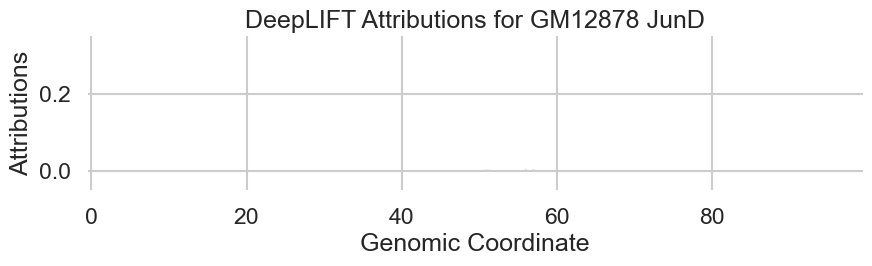

In [6]:
from matplotlib import pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
from tangermeme.plot import plot_logo

plt.figure(figsize=(10, 2))
ax = plt.subplot(111)
plot_logo(X_attr[0, :, 950:1050], ax=ax)

plt.xlabel("Genomic Coordinate")
plt.ylabel("Attributions")
plt.title("DeepLIFT Attributions for GM12878 JunD")
plt.ylim(-0.05, 0.35)
plt.show()